In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

In [102]:

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# X["MedHouseVal"] = y
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [103]:
X_normalized = (X - X.min()) / (X.max() - X.min())
X_normalized

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


<Axes: xlabel='MedHouseVal', ylabel='Count'>

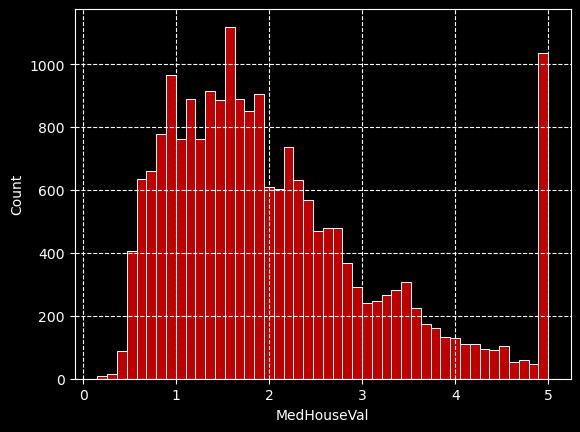

In [104]:
plt.style.use('dark_background')
plt.grid(linestyle='--')
sns.histplot(y, color="red")

In [105]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y)

In [107]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    
    return np.sqrt(mse)

In [108]:
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred_test = regr.predict(X_test)
rmse_test = rmse(y_test, y_pred_test)
rmse_test_sk = mean_squared_error(y_test, y_pred_test, squared=False)

/home/alex/anaconda3/envs/env_for_gpu/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [109]:
print(f"test: {round(rmse_test, 2)}")
print(f"test_sk: {round(rmse_test_sk, 2)}")
print(regr.score(X_train, y_train))

test: 0.74
test_sk: 0.74
0.6087309100104563


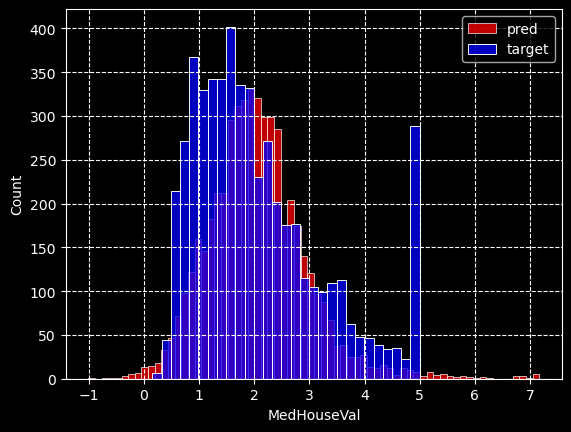

In [110]:

sns.histplot(y_pred_test, label="pred", color="red")
sns.histplot(y_test, label="target", color="blue")
plt.grid(linestyle='--')
plt.legend()